In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from tensorboard.backend.event_processing import event_accumulator 
from collections import defaultdict

In [2]:
LOG_DIR = "./mpe_logs"
LOG_DIR2 = "./cp_mpe_logs"
LOG_DIR3 = "./new_cp_mpe_logs"

SAVE_NUMPY = False     

STORE_EVERYTHING_SIZE_GUIDANCE = {
    'compressedHistograms': 0, 
    'images': 0, 
    'audio': 0, 
    'scalars': 0, 
    'histograms': 0, 
} 

CUT = 29999    

In [3]:
def get_values(filename, scalar="Episodic_Reward"): 
    ea = event_accumulator.EventAccumulator(filename, size_guidance=STORE_EVERYTHING_SIZE_GUIDANCE)
    ea.Reload()
    # print(ea.Tags()) 
    ea_scalar = ea.Scalars(tag=scalar) 
    ea_scalar = pd.DataFrame(ea_scalar) 
    return ea_scalar 

In [4]:
if SAVE_NUMPY: 
    logs = glob.glob(os.path.join(LOG_DIR3, "*/**/event*"), recursive=True) 
    for log in logs: 
        print(log) 
        vals = get_values(log, scalar="Episodic Return")['value'].to_numpy() 
        # vals = get_values(log, scalar="Episodic_Reward")['value'].to_numpy() 
        path = "/".join(log.split("/")[:-1]) 
        with open(path+'/arr.npy', 'wb') as f: 
            np.save(f, vals) 
        # break 

In [5]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    # return np.array(pd.Series(y).rolling(box_pts).mean()) 
    return y_smooth

{'giam--n_2', 'cam_plus_other_obs--n_2--cp_update_timestep_50', 'cam_plus_other_obs--n_2--cp_update_timestep_15', 'cam_plus_other_obs--n_2--cp_update_timestep_30', 'noam--n_2--random_other_agent_1', 'cam_plus_other_obs--n_2--cp_update_timestep_20', 'cam_plus_other_obs--n_2--cp_update_timestep_10', 'noam--n_2--random_other_agent_0', 'cam_plus_other_obs--n_2--cp_update_timestep_100', 'cam_plus_other_obs--n_2--cp_update_timestep_5'}
exp: giam--n_2
(21, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_50
(21, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_15
(13, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_30
(21, 29999)
exp: noam--n_2--random_other_agent_1
(20, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_20
(18, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_10
(21, 29999)
exp: noam--n_2--random_other_agent_0
(20, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_100
(21, 29999)
exp: cam_plus_other_obs--n_2--cp_update_timestep_5
(21, 

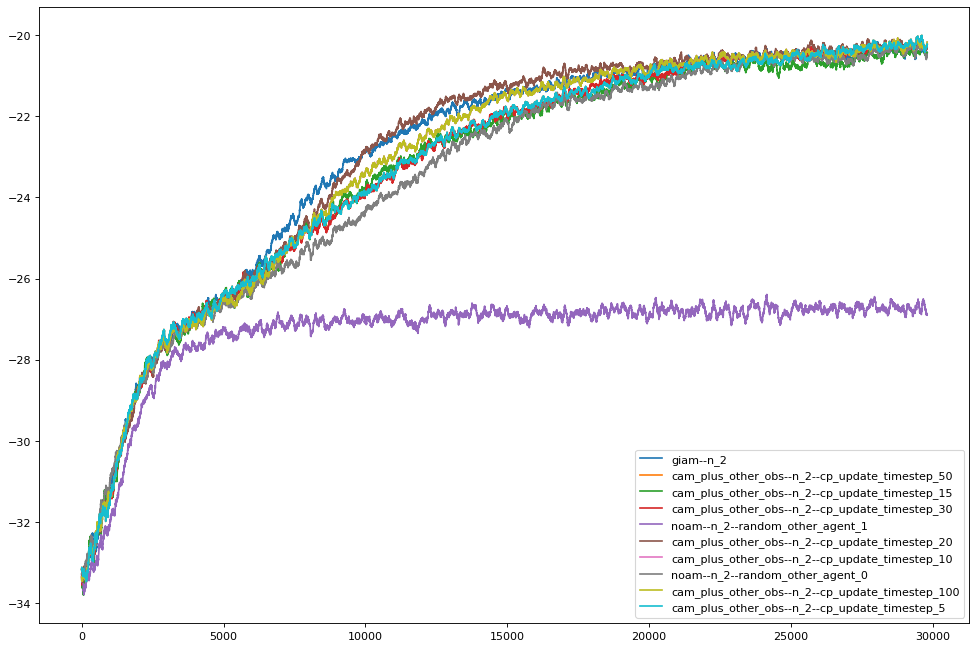

In [9]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

logs = glob.glob(os.path.join(LOG_DIR, "*/**/*.npy"), recursive=True) 
logs2 = glob.glob(os.path.join(LOG_DIR2, "*/**/*.npy"), recursive=True) 
logs3 = glob.glob(os.path.join(LOG_DIR3, "*/**/*.npy"), recursive=True) 
# logs.extend(logs2)
logs.extend(logs3)
exps = set() 
[exps.add("--".join(l.split("/")[-2].split("--")[:-1]))  for l in logs] 
print(exps) 
# exps = [
#     item for item in exps 
#     if 
#     (('update_timestep' not in item) 
#     and ('cam_plus_other_obs' not in item)) 
# #     or ('update_timestep' in item) 
# #     and (int(item.split("--")[-1].split("_")[-1])<50)
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new' not in item 
#     if 'cam_plus_other_obs' not in item 
#     and 'giam' not in item 
#     and 'noam' not in item 
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new--n_2--cp_update_timestep_50' in item 
#     or 'cam_plus_other_obs--n_2--cp_update_timestep_20' in item 
#     or 'giam' in item 
#     or 'noam' in item 
# ]


vals = [] 
for e in exps: 
    print("exp:", e) 
    vals = [] 
    for l in logs: 
        if e in l: 
            x = np.load(l) 
#             print(l, x.shape) 
            if (x.shape[0]>CUT): 
                vals.append(x[:CUT]) 
    vals = np.array(vals)
    print(vals.shape)
    val_means = smooth(np.mean(vals, axis=0))[100:-100]
    val_stds = smooth(np.std(vals, axis=0), 100)[100:-100]
#     print(val_std.shape) 
    plt.plot(val_means, label = e )
#     plt.fill_between(np.arange(1, val_means.shape[0]+1), 
#                     val_means - val_stds, 
#                     val_means + val_stds, 
#                     alpha=0.1) 
#     break 
plt.legend() 
plt.show() 


In [7]:
exps 

{'cam_new--n_2--cp_update_timestep_100',
 'cam_new--n_2--cp_update_timestep_200',
 'cam_new--n_2--cp_update_timestep_30',
 'cam_new--n_2--cp_update_timestep_50',
 'cam_plus_other_obs--n_2--cp_update_timestep_10',
 'cam_plus_other_obs--n_2--cp_update_timestep_100',
 'cam_plus_other_obs--n_2--cp_update_timestep_15',
 'cam_plus_other_obs--n_2--cp_update_timestep_20',
 'cam_plus_other_obs--n_2--cp_update_timestep_30',
 'cam_plus_other_obs--n_2--cp_update_timestep_5',
 'cam_plus_other_obs--n_2--cp_update_timestep_50',
 'giam--n_2',
 'noam--n_2--random_other_agent_0',
 'noam--n_2--random_other_agent_1'}